## Non parametric statistics

Statistical models can be roughly divided into two classes, parametric and non-parametric.

A model is parametric if it is fully defined by set of parameters $\theta_1, \theta_2,...,\theta_K$ (we assume a certain "family" of distributions, e.g normal or exponential)

A model is non-parametric if it does not assume a specific family of distribution. 

Stricter assumptions -> more powerful results -> more narrow area of application.

## Sign tests


### One-sample sign test

One-sample sign test is applied in similar testing problems as one-sample t-test. However, it makes much milder distributional assumptions.

One-sample sign test, assumptions
* Let $x_1, ..., x_n$ be an i.i.d sample from continuous distribution with the median m.

One-sample sign test, hypotheses $$H_0: m = m_0, H_1: m \neq m_0$$

One-sample sign test, test statistic

* The test statistic S equals to number of cases with $x_i>m_0$ (alternatively, the number of cases with $x_i<m_0$) and follows binomial distribution with parameters n and $\frac{1}{2}$ under $H_0$
* Under $H_0$ the expected value of the test statistic is $\frac{1}{2} n$ (its variance is $\frac{1}{4}n$) and both large and small values of the test statistic suggest that the null hypothesis $H_0$ is false.


### One-sample sign test, asymptotic distribution

* If the sample size is large, then the standardized test statistic $$Z = \frac{S - \frac{n}{2}}{\sqrt{\frac{n}{4}}}$$ follows approximately the standard normal distribution under $H_0$

* For large n, the p-value of the test can thus be retrieved from a normal table.
* The approximation is usually good enough when n>20. For smaller samples, it is better to rely on the exact distribution of the test statistic S (which is binomial distribution).

### One-sample sign test and discreet distributions

Sign test can be used for discrete variables as well

In that case, it is possible that for some of the differences, $x_i-m_0=0$, are neither positive nor negative.

If the number of zeros is small compared to the sample size, these observations can be deleted and the sample size can be modified accordingly.

If the number of zeros is large, then the zeros should be dealt with such that they are against rejecting a null hypothesis (conservative approach)

* For example, consider the case of two-tailed alternative hypothesis, 3 negative difference, 15 positive differences and 6 zero differences. Now the test should be conducted as there were 9 negative differences and 15 positive ones.


### One-sample sign test example

In [2]:
import statsmodels.api as sm
faithful = sm.datasets.get_rdataset("faithful", cache=True).data
print (faithful.head())

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


In [4]:
# Claim: the location of eruption times equal to 3 minutes 35 seconds
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'waiting')

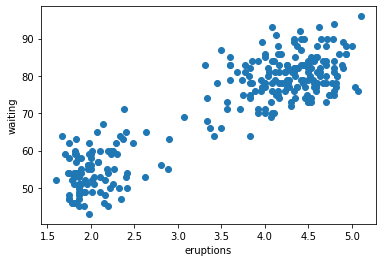

In [9]:
plt.plot(faithful['eruptions'], faithful['waiting'], 'o')
plt.xlabel('eruptions')
plt.ylabel('waiting')

(array([ 4., 32., 22., 10., 13., 10.,  1.,  2.,  1.,  2.,  1.,  0.,  5.,
         3.,  7., 11., 10., 20., 19., 21., 27., 19., 19.,  9.,  4.]),
 array([1.6 , 1.74, 1.88, 2.02, 2.16, 2.3 , 2.44, 2.58, 2.72, 2.86, 3.  ,
        3.14, 3.28, 3.42, 3.56, 3.7 , 3.84, 3.98, 4.12, 4.26, 4.4 , 4.54,
        4.68, 4.82, 4.96, 5.1 ]),
 <a list of 25 Patch objects>)

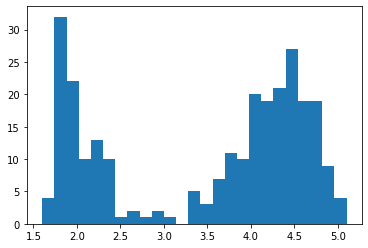

In [11]:
plt.hist(faithful['eruptions'], 25)

In [12]:
# Is the median of erruption times equal to 3 minutes 35 seconds
# H_0: med = 3.583
# H_1: med != 3.583

In [13]:
n = len(faithful)

In [14]:
n

272

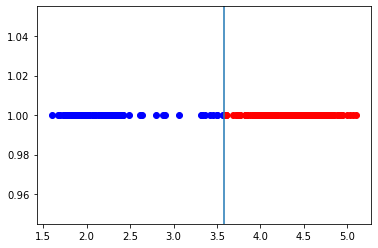

In [20]:
# Test statistic is the amount of red points
import numpy as np
plt.plot(faithful.loc[faithful['eruptions']<=3.583, 'eruptions'], np.ones(faithful.loc[faithful['eruptions']<=3.583, 'eruptions'].shape), 'o', c='b')
plt.plot(faithful.loc[faithful['eruptions']>3.583, 'eruptions'], np.ones(faithful.loc[faithful['eruptions']>3.583, 'eruptions'].shape),'o',c='r')
plt.axvline(3.583)

In [21]:
s = sum(faithful['eruptions']>3.583)

In [22]:
s

164

In [23]:
from scipy import stats

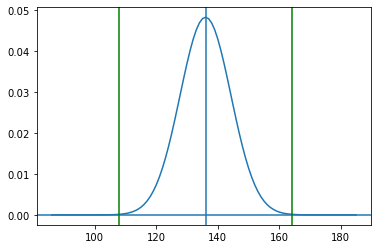

In [26]:
# If H_0 is true we expect around n/2=136 obs to be larger than 3.583
x = np.arange(n/2-50, n/2+50)
plt.plot(x, stats.binom.pmf(x, n, 0.5))
plt.axhline(0)
plt.axvline(0.5*n)
# The corresponding observed amount is 164
# p-value is the probability of values outside the green lines
plt.axvline(n*0.5+abs(s-0.5*n), c='g') # this what we observe
plt.axvline(n*0.5-abs(s-0.5*n), c='g')

In [31]:
# Exact binomial test significance value 0.5
p_value = stats.binom_test(s, n)

In [32]:
p_value

0.0008217570096469431

In [33]:
# p-value very small we can reject H_0

In [34]:
# The same with normal approximation
z = (s - n/2)/np.sqrt(n/4)

In [41]:
z

3.395498750508662

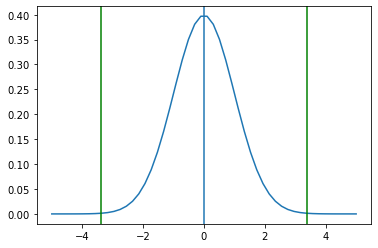

In [40]:
plt.plot(np.linspace(-5,5), stats.norm.pdf(np.linspace(-5,5)))
plt.axvline(0)
# pvalue is a probability of values outside green area
plt.axvline(-abs(z), c='g')
plt.axvline(abs(z), c='g')

In [50]:
2* (1 - stats.norm.cdf(abs(z)))

0.0006850368653792405

### One-sample sign test vs one-sample t-test

In [51]:
# t-test for the same data on significance leve 5%
stats.ttest_1samp(faithful['eruptions'], 3.583)

Ttest_1sampResult(statistic=-1.3758516667415672, pvalue=0.17000355469840356)

(array([ 4., 32., 22., 10., 13., 10.,  1.,  2.,  1.,  2.,  1.,  0.,  5.,
         3.,  7., 11., 10., 20., 19., 21., 27., 19., 19.,  9.,  4.]),
 array([1.6 , 1.74, 1.88, 2.02, 2.16, 2.3 , 2.44, 2.58, 2.72, 2.86, 3.  ,
        3.14, 3.28, 3.42, 3.56, 3.7 , 3.84, 3.98, 4.12, 4.26, 4.4 , 4.54,
        4.68, 4.82, 4.96, 5.1 ]),
 <a list of 25 Patch objects>)

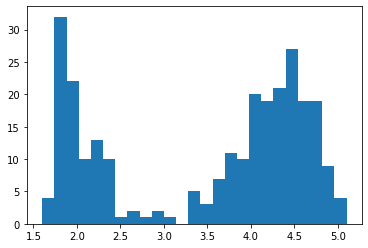

In [52]:
# Why do conclusions differ even though both tests test whether th location is 3.583
plt.hist(faithful['eruptions'], 25)

### Power comparison

We have a sample of size 20 from N(mu, 1) - distribution


H_0: mu = 0

H_1: mu != 0

Tests: one-sample t-test vs one-sample sign test on significance level 5%

#### Type 1 error rates

We generate a sample where H_0 is true and see whether the test "sees" this

In [53]:
x = np.random.normal(0, 1, 20)

In [54]:
# The null distribution of the test statistic with the critical points
def t_density(x):
    return stats.t.pdf(x, 19)

In [60]:
stats.ttest_1samp(x, 0)[0]

-1.1999527627061009

In [61]:
t_obs = stats.ttest_1samp(x, 0)[0]

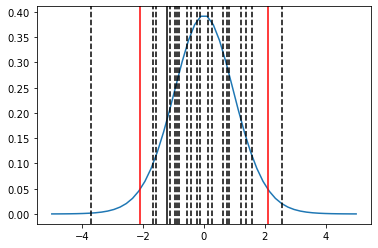

In [66]:
plt.plot(np.linspace(-5, 5), t_density(np.linspace(-5,5)))
plt.axvline(stats.t.ppf(0.025, 19), c='r')
plt.axvline(stats.t.ppf(0.975, 19), c='r')
plt.axvline(t_obs, c='black')
for i in range(20):
    plt.axvline(stats.ttest_1samp(np.random.normal(0,1,20), 0)[0], c='black', linestyle='--')

In [71]:
# Simulated probabilities 

(np.array([stats.ttest_1samp(np.random.normal(0,1,20), 0)[1] for i in range(10000)])<0.05).mean()

0.0486

In [73]:
(np.array([stats.binom_test(sum(np.random.normal(0,1,20)>0), 20) for i in range(10000)])<0.05).mean()

0.0362

#### Type II error when the true value is actually mu = 1

In [76]:
# The null distribution
# observed value
x = np.random.normal(1,1,20)
t_obs = stats.ttest_1samp(x, 0)[0]

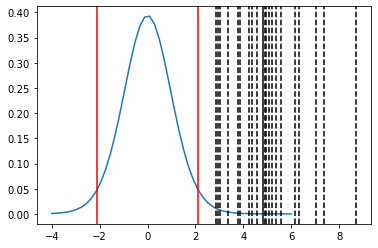

In [78]:
plt.plot(np.linspace(-4, 6), t_density(np.linspace(-4,6)))
plt.axvline(stats.t.ppf(0.025, 19), c='r')
plt.axvline(stats.t.ppf(0.975, 19), c='r')
plt.axvline(t_obs, c='black')
for i in range(20):
    plt.axvline(stats.ttest_1samp(np.random.normal(1,1,20), 0)[0], c='black', linestyle='--')

In [80]:
(np.array([stats.ttest_1samp(np.random.normal(1,1,20), 0)[1] for i in range(10000)])>=0.05).mean()

0.0104

In [82]:
(np.array([stats.binom_test(sum(np.random.normal(1,1,20)>0), 20) for i in range(10000)])>=0.05).mean()

0.0835

Sign test has larger type 2 error rate for normally distributed data